In [1]:
from datetime import datetime
import time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Jogging.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print(f"Number of rows: {len(df1)}")
print(f"Number of columns: {len(df1.columns)}")

print("\nData from", file_name)
print(df1)

Number of rows: 303
Number of columns: 14

Data from Jogging.csv
     ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                    5.0087                  3.5865                  6.0478   
1                    3.0957                  5.5929                 18.5479   
2                   13.5871                -21.6699                  0.7638   
3                   31.3640                 -5.3798                 14.5974   
4                   -2.3296                 22.6611                 21.1600   
..                      ...                     ...                     ...   
298                 -6.8112                  0.4208                  9.9583   
299                 -3.0870                 10.7587                 11.1269   
300                 -1.6448                  3.7032                  8.9925   
301                  1.8054                  4.5951                  9.8435   
302                 -4.3451                  3.2411               

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count              303.000000              303.000000              303.000000   
mean                 0.230725               -2.363080                1.401476   
std                 13.444718               19.212073               12.117706   
min                -55.919000              -61.229600              -33.882400   
25%                 -7.123450              -11.053

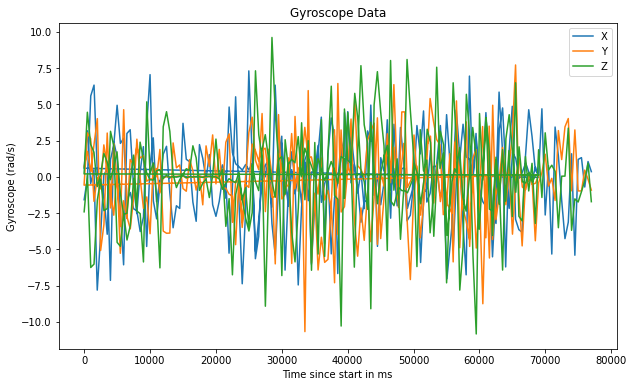

In [3]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Jogging.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

plt.figure(figsize=(10, 6))
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE X (rad/s)'], label='X')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Y (rad/s)'], label='Y')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Z (rad/s)'], label='Z')
plt.xlabel('Time since start in ms')
plt.ylabel('Gyroscope (rad/s)')
plt.title('Gyroscope Data')
plt.legend()
plt.show()

In [4]:
df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').values.astype(np.int64) // 1000

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
Timestamp (microseconds)        0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count              303.000000              303.000000              303.000000   
mean                 0.230725               -2.363080                1.401476   
std                 13.444718               19.212073               12.117706   
min                -55.919000              -61.229600              -33.882400   
25%                 -7.123450              -11.053

In [5]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'Jogging.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Original DataFrame:")
print(df1.head())

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000

print("\nDataFrame with converted timestamps:")
print(df1[['YYYY-MO-DD HH-MI-SS_SSS', 'Timestamp (microseconds)']].head())

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

start = pd.Timestamp(year=2021, month=2, day=19, hour=23, minute=34, second=25, microsecond=292000)
start_ts = int(start.timestamp() * 1e6)

end = pd.Timestamp(year=2021, month=5, day=19, hour=23, minute=35, second=27, microsecond=728000)
end_ts = int(end.timestamp() * 1e6)

DF1 = df1.loc[(df1['Timestamp (microseconds)'] >= start_ts) & (df1['Timestamp (microseconds)'] <= end_ts)]

DF1['Activity_Label'] = 'Jogging'

DF1 = DF1[['Timestamp (microseconds)', 'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'Activity_Label']]
DF1 = DF1.rename(columns={
    'GYROSCOPE X (rad/s)': 'Gyro X (°/s)',
    'GYROSCOPE Y (rad/s)': 'Gyro Y (°/s)',
    'GYROSCOPE Z (rad/s)': 'Gyro Z (°/s)'
})

DF1.reset_index(drop=True, inplace=True)

print("\nFiltered DataFrame with index column:")
print(DF1)

Original DataFrame:
   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                  5.0087                  3.5865                  6.0478   
1                  3.0957                  5.5929                 18.5479   
2                 13.5871                -21.6699                  0.7638   
3                 31.3640                 -5.3798                 14.5974   
4                 -2.3296                 22.6611                 21.1600   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0            3.0025            4.0308            8.4207   
1            1.8939            2.9892            9.1459   
2            9.2328            3.1869           -0.8776   
3            8.4778           -1.9642           -4.5211   
4            8.3773           -2.7779           -4.2748   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                        2.0062                       -0.4442   
1                        1.2018 

/tmp/ipykernel_8348/3267807484.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000


In [6]:
output_file_path = "Final_Cleaned_Jogging_Gyro.csv"
DF1.to_csv(output_file_path, index=False)

print(f"Filtered DataFrame saved to {output_file_path}")

Filtered DataFrame saved to Final_Cleaned_Jogging_Gyro.csv


In [7]:
filtered_df = pd.read_csv("Final_Cleaned_Jogging_Gyro.csv")

filtered_df.reset_index(drop=True, inplace=True)

print("\nLoaded DataFrame with numerical index and Timestamp (microseconds):")
print(filtered_df)


Loaded DataFrame with numerical index and Timestamp (microseconds):
     Timestamp (microseconds)  Gyro X (°/s)  Gyro Y (°/s)  Gyro Z (°/s)  \
0            1621000071107000       -1.5828        0.6946       -2.4160   
1            1621000071608000       -0.0641        1.7532        0.1222   
2            1621000072109000        5.5827        0.3622       -6.2577   
3            1621000072608000        6.3249        2.2345       -6.0225   
4            1621000073108000        0.1894        4.0128       -1.6066   
..                        ...           ...           ...           ...   
298          1621000104101000        1.1997       -0.9754       -1.7400   
299          1621000104602000        1.3217       -0.9754       -1.0320   
300          1621000105100000       -0.7055        0.4626       -0.2547   
301          1621000105601000        1.0526       -0.1691        0.9427   
302          1621000106101000        0.3554       -0.9201       -1.7165   

    Activity_Label  
0        